<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><h2>Classification Model Development</h2>
<h4>By Raquel Alvarenga</h4>


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h2>Analytical Objectives</h2><br>
This script encompasses feature engineering, model preparation, variable selection, and model development<br>
of a Game of Thrones dataset.<br><br>
The main goals are to: <br>
a) Make a prediction for the survival of each character in Games of Thrones, which is assumed to be a categorical variable.<br>
b) Identify key features that impact survival.<br>
<br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

## 1) Importing Libraries and Inspecting Dataset

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from copy import deepcopy 
from sklearn.model_selection import train_test_split # train-test split
from sklearn.linear_model import LogisticRegression  # logistic regression
import statsmodels.formula.api as smf                # logistic regression
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.preprocessing import StandardScaler     # standard scaler
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import plot_tree  
from sklearn.model_selection import RandomizedSearchCV # hyperparameter tuning
from sklearn.metrics import make_scorer 
from sklearn.ensemble import RandomForestClassifier  # random forest package

file= './GOT_character_predictions.xlsx'

#making sure these variables are floats.
data_type = {'age' : float,
            'popularity':float}

# creating data frame from excel file
got= pd.read_excel(io=file,
                  dtype= data_type)

print(f"""
Game of Thrones Dataframe features:
-----------------------------------

Number of rows: {got.shape[0]} rows
    
Number of Columns {got.shape[1]} columns
""")


Game of Thrones Dataframe features:
-----------------------------------

Number of rows: 1836 rows
    
Number of Columns 23 columns



In [2]:
got.info(verbose= True) # checking columns and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1836 entries, 0 to 1835
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   S.No                        1836 non-null   int64  
 1   name                        1836 non-null   object 
 2   title                       880 non-null    object 
 3   male                        1836 non-null   int64  
 4   culture                     627 non-null    object 
 5   dateOfBirth                 391 non-null    float64
 6   mother                      21 non-null     object 
 7   father                      26 non-null     object 
 8   heir                        23 non-null     object 
 9   house                       1422 non-null   object 
 10  spouse                      256 non-null    object 
 11  book1_A_Game_Of_Thrones     1836 non-null   int64  
 12  book2_A_Clash_Of_Kings      1836 non-null   int64  
 13  book3_A_Storm_Of_Swords     1836 

In [3]:
# inspecting descriptive statisitcs.
got.describe().round(decimals=2)

,S.No,male,dateOfBirth,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveFather,isAliveMother,isAliveSpouse,isAliveHeir,age,popularity,isAlive
count,1836.00,1836.00,391.00,1836.00,1836.00,1836.00,1836.00,1836.00,21.00,26.00,23.00,256.00,410.00,1836.00,1836.00
mean,918.50,0.61,1717.91,0.19,0.58,0.47,0.37,0.38,0.71,0.19,0.65,0.77,-1368.04,0.08,0.73
std,530.15,0.49,20587.05,0.39,0.49,0.50,0.48,0.48,0.46,0.40,0.49,0.42,20104.31,0.15,0.44
min,1.00,0.00,-28.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-298001.00,0.00,0.00
25%,459.75,0.00,237.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,18.00,0.01,0.00
50%,918.50,1.00,267.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,27.00,0.03,1.00
75%,1377.25,1.00,285.00,0.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,49.75,0.08,1.00
max,1836.00,1.00,298299.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,100.00,1.00,1.00


In [4]:
# preliminary correlation with isAlive
df_corr= got.corr(method='pearson').round(decimals=2)
df_corr['isAlive'].sort_values(ascending = False)

isAlive                       1.00
isAliveSpouse                 0.38
book2_A_Clash_Of_Kings        0.26
isAliveMother                 0.20
isAliveHeir                   0.16
age                           0.12
book5_A_Dance_with_Dragons    0.01
book3_A_Storm_Of_Swords      -0.01
isAliveFather                -0.04
dateOfBirth                  -0.08
book4_A_Feast_For_Crows      -0.08
S.No                         -0.12
male                         -0.16
book1_A_Game_Of_Thrones      -0.17
popularity                   -0.22
Name: isAlive, dtype: float64

<br><h2> 2) Missing Values Analysis and Imputation</h2>



In [5]:
# Checking null values
got.isnull().sum().sort_values(ascending=False)

isAliveFather                 1815
mother                        1815
heir                          1813
isAliveSpouse                 1813
father                        1810
isAliveMother                 1810
spouse                        1580
isAliveHeir                   1580
dateOfBirth                   1445
age                           1426
culture                       1209
title                          956
house                          414
S.No                             0
popularity                       0
book1_A_Game_Of_Thrones          0
book5_A_Dance_with_Dragons       0
book4_A_Feast_For_Crows          0
book3_A_Storm_Of_Swords          0
book2_A_Clash_Of_Kings           0
name                             0
male                             0
isAlive                          0
dtype: int64

In [6]:
# flagging missing values with new variables
for col in got:
    if got[col].isnull().astype(int).sum() > 0:
        got['m_'+col] = got[col].isnull().astype(int)
        
got.head()

,S.No,name,title,male,culture,dateOfBirth,mother,father,heir,house,...,m_mother,m_father,m_heir,m_house,m_spouse,m_isAliveFather,m_isAliveMother,m_isAliveSpouse,m_isAliveHeir,m_age
0,1,Erreg,King,0,Andal,NaN,NaN,NaN,NaN,NaN,...,1,1,1,1,1,1,1,1,1,1
1,2,Hugor of the Hill,King of the Andals,1,Andals,NaN,NaN,NaN,NaN,NaN,...,1,1,1,1,1,1,1,1,1,1
2,3,Azor Ahai,NaN,0,Asshai,NaN,NaN,NaN,NaN,NaN,...,1,1,1,1,0,1,1,1,0,1
3,4,Melisandre,NaN,0,Asshai,NaN,NaN,NaN,NaN,R'hllor,...,1,1,1,0,1,1,1,1,1,1
4,5,Kraznys mo Nakloz,NaN,1,Astapor,NaN,NaN,NaN,NaN,Good Masters,...,1,1,1,0,1,1,1,1,1,0


In [7]:
# Looking at negative ages
got.loc[:,['name','age']][got.loc[:,'age']<=0]  

,name,age
443,Addam Velaryon,-298001.0
748,Polliver,-277980.0
1151,Lymond Vikary,0.0
1224,Harmune,0.0


In [8]:
# Filling null values in the following categorical variables.

# title- removing weird character [1] and imputing null values.
got['title'] = got['title'].replace('[1]','unknown_title')
got['title'].fillna(value = 'unknown_title',
                         inplace = True)
# culture- imputing null values.
got['culture'] = got['culture'].replace([1.0],'unknown_culture')
got['culture'] = got['culture'].replace([0.0],'unknown_culture')
got['culture'].fillna(value = 'unknown_culture',
                         inplace = True)
# dateOfBirth- imputing null values.
got['dateOfBirth'].fillna(value = 'unknown_dateOfBirth',
                         inplace = True)
# mother - imputing null values.
got['mother'].fillna(value = 'unknown_mother',
                         inplace = True)

# father- imputing null values.
got['father'].fillna(value = 'unknown_father',
                         inplace = True)

# heir- imputing null values.
got['heir'].fillna(value = 'unknown_heir',
                         inplace = True)

# house- imputing null values.
got['house'].fillna(value = 'unknown_house',
                         inplace = True)

# spouse- imputing null values.
got['spouse'].fillna(value = 'unknown_spouse',
                         inplace = True)


In [9]:
# Converting Binary Variables to categorical and filling NAs.

# isAliveFather
got['isAliveFather'] = got['isAliveFather'].replace([1.0],'yes_alive_father')
got['isAliveFather'] = got['isAliveFather'].replace([0.0],'no_alive_father')
got['isAliveFather'].fillna(value = 'unknown_alive_father',
                         inplace = True)
# isAliveMother
got['isAliveMother'] = got['isAliveMother'].replace([1.0],'yes_alive_mother')
got['isAliveMother'] = got['isAliveMother'].replace([0.0],'no_alive_mother')
got['isAliveMother'].fillna(value = 'unknown_alive_mother',
                         inplace = True)

# isAliveSpouse
got['isAliveSpouse'] = got['isAliveSpouse'].replace([1.0],'yes_alive_spouse')
got['isAliveSpouse'] = got['isAliveSpouse'].replace([0.0],'no_alive_spouse')
got['isAliveSpouse'].fillna(value = 'unknown_alive_spouse',
                         inplace = True)

# isAliveHeir
got['isAliveHeir'] = got['isAliveHeir'].replace([1.0],'yes_alive_heir')
got['isAliveHeir'] = got['isAliveHeir'].replace([0.0],'no_alive_heir')
got['isAliveHeir'].fillna(value = 'unknown_alive_heir',
                          inplace = True)

#Inputing Missing values in continuous variables.

# age
got['age'].fillna(value = 0,inplace=True)

# popularity
median_pop= got['popularity'].median()
got['popularity'].fillna(value = median_pop,inplace=True)
                  
                  
                                 

In [10]:
# Creating dictionary to narrow down cultures.
culgroup = {
    'Summer_Islands': ['summer islands','summer islander','summer isles'],
    'Ghiscari': ['ghiscari','ghiscaricari','ghis'],
    'Asshai': ['asshai'],
    'Lysene': ['lysene','lyseni'],
    'Astapor':['astapor','astapori'],
    'Braavosi': ['braavosi','braavos'],
    'Dornish': ['dornishmen','dorne','dornish'],
    'Myrish': ['myr','myrish','myrmen'],
    'Westermen': ['westermen','westerman','westerlands'],
    'Westerosi': ['westeros','westerosi','first men'],
    'Stormlander': ['stormlands','stormlander'],
    'Norvoshi': ['norvos','norvoshi'],
    'Northmen': ['northmen','northern mountain clans'],
    'FreeFolk': ['widling','free_folk'],
    'Qartheen': ['qartheen','qarth'],
    'Reach': ['reach'],
    'Ironborn': ['ironborn','ironmen'],
    'Mereen': ['mereen','meereenese'],
    'RiverLands': ['riverlands','rivermen'],
    'Vale': ['vale','valemen','vale mountain clans','valyrian'],
    'Ghiscari': ['ghiscari','ghiscaricari'],
    'Stormlands': ['stormlands','stormlander'],
    'Lhazareen': ['lhazareen','lhazarene'],
    'Dothraki': ['dothraki'],
    'Tyroshi' : ['tyroshi'],
    'Crannogmen' : ['crannogmen'],
    'other_clans': ['sistermen','rhoynar','naathi','pentoshi','qohor','andal',
                    'andals','wilding','wildings' ]    
}

# user-defined function to categorize cultures based on their culture names.
def get_cul(culture):
    culture= culture.lower()
    c= [k for (k,c) in culgroup.items() if culture in c]
    return c[0] if len(c) > 0 else culture.title()

got.loc[:,'culture_groups']= [get_cul(culture) for culture in got['culture']]

In [11]:
# Creating categories for title to improve model.
# 1) royalty 2) other_title 3)unknown

# user-defined function to categorize titles based on their title names.
def get_title(df_title):
    df_title= df_title
    # royalty category
    if "Lord" in df_title or "Queen" in df_title or "King" in df_title or\
    "Prince" in df_title or "Princess" in df_title or "Master" in df_title\
    or 'Sealord'in df_title:
        return 'royalty'
    # unkonwns category
    elif "unknown_title" in df_title:
        return "unknown_title"
    # non_royalty category
    else:
        return 'other_title'
    
# creating a new variable to store results.    
got.loc[:,'title_groups']= [get_title(df_title) for df_title in got['title']]

In [12]:
# Creating categories for house to improve model.
# 1) main_house 2) other_house 3)unknown

# user-defined function to categorize titles based on their title names.
def get_house(df_house):
    df_house= df_house
    # main_house category
    if "House Frey" in df_house or "House Stark" in df_house or "Night's Watch"\
    in df_house or "Night's Watch" in df_house or "House Tyrell" in df_house \
    or "House Targaryen" in df_house or 'House Greyjoy'in df_house or\
    'House Lannister' in df_house or 'House Hightower' in df_house or\
    'House Martell' in df_house or 'House Osgrey' in df_house or\
    'Faith of the Seven' in df_house or 'House Botley' in df_house or\
    'House Florent' in df_house: 
        return 'main_house'
    # unkonwns category
    elif "unknown_house" in df_house:
        return "unknown_house"
    # other_house category
    else:
        return 'other_house'
    
# creating a new variable to store results.    
got.loc[:,'house_groups']= [get_house(df_house) for df_house in got['house']]

In [13]:
# Creating Categories for Age based on interquartile ranges.
# Creating a while loop to make the categories.
idx = 0
age_bin = deepcopy(got['age']) #copying the original value of age
#changing and replacing the values in the new column to not modify the original data.
while idx < len(got['age']):
    var = got['age'][idx]
    if var == 0:
        age_bin[idx] = 'unknown_age' # Negative values being set to unknown.
    elif var <0:
        age_bin[idx] = 'unknown_age' # below 26 age is considered young.
    elif var < 26:
        age_bin[idx] = 'young' #below 26 age is considered young.
    elif var < 51:
        age_bin[idx] = 'mature' # over 25 and below 51 is considered mature.
    else:
        age_bin[idx] = 'old' # over 51 is considered old.
    idx += 1
got['age_bin'] = age_bin

In [14]:
# Creating Categories for Popularity based on interquartile ranges.
# Creating a while loop to make the categories.

#Creating a while loop to make the categories
idx = 0
popularity_bin = deepcopy(got['popularity']) #copying the original value of popularity.
#changing and replacing the values in the new column to not modify the original data.
while idx < len(got['popularity']):
    var = got['popularity'][idx]
     # characters with no score are in this category.
    if var == 0:
        popularity_bin[idx] = 'not_popular'
        
    elif var < 0.3:
        popularity_bin[idx] = 'somewhat_popular' #below the median.
        
    #above the median is considered popular given the distribution of age.
    else:
        popularity_bin[idx] = 'popular'#above the median is considered popular.
    idx += 1
#creating new variable
got['popularity_bin'] = popularity_bin

## 3) Dummy Variables

In [15]:
# Encoding the categorical variables -  one hot encoding categorical variables
one_hot_title      = pd.get_dummies(got['title_groups'])
one_hot_culture     = pd.get_dummies(got['culture_groups'])
one_hot_popularity     = pd.get_dummies(got['popularity_bin'])
one_hot_house = pd.get_dummies(got['house_groups'])
one_hot_isAliveFather = pd.get_dummies(got['isAliveFather'])
one_hot_isAliveMother = pd.get_dummies(got['isAliveMother'])
one_hot_isAliveSpouse = pd.get_dummies(got['isAliveSpouse'])
one_hot_isAliveHeir = pd.get_dummies(got['isAliveHeir'])
one_hot_age= pd.get_dummies(got['age_bin'])


In [16]:
# Joining codings together
got = got.join([one_hot_title,
                one_hot_culture,
                one_hot_popularity,
                one_hot_house,
                one_hot_isAliveFather,
                one_hot_isAliveMother,
                one_hot_isAliveSpouse,
                one_hot_isAliveHeir,
                one_hot_age
               ]) #the dummies will be include in the data without deleting the previous information

# Saving new columns
new_columns = got.columns

## 3) Model Development
### Statsmodel Logistic Regression

This is a preliminary model to better understand the relationship of all explanatory variables with our response <br>variable 'isAlive'.

In [17]:
# declaring  explanatory variables
got_data_stats = got.drop(['isAlive'],axis=1)

# declaring response variable
got_target_stats = got.loc[:,'isAlive']

In [18]:
# train-test split with stratification
x_train_stats , x_test_stats, y_train_stats, y_test_stats = train_test_split(
            got_data_stats, # x variables
            got_target_stats, # y variable
            test_size    = 0.10,
            random_state = 219,
            stratify     = got_target_stats) # preserving balance


# merging training data for statsmodels
got_train = pd.concat([x_train_stats, y_train_stats], axis = 1)

In [19]:
print(f"""

Response Variable Proportions (Training Set)
--------------------------------------------
{y_train_stats.value_counts(normalize = True).round(decimals = 2)}



Response Variable Proportions (Testing Set)
--------------------------------------------
{y_test_stats.value_counts(normalize = True).round(decimals = 2)}
""")




Response Variable Proportions (Training Set)
--------------------------------------------
1    0.73
0    0.27
Name: isAlive, dtype: float64



Response Variable Proportions (Testing Set)
--------------------------------------------
1    0.73
0    0.27
Name: isAlive, dtype: float64



In [20]:
#preparing variables for ols model
for var in got_train: 
    if var != 'isAlive':
        print(f"""{var} + """)
    else:
        pass  


S.No + 
name + 
title + 
male + 
culture + 
dateOfBirth + 
mother + 
father + 
heir + 
house + 
spouse + 
book1_A_Game_Of_Thrones + 
book2_A_Clash_Of_Kings + 
book3_A_Storm_Of_Swords + 
book4_A_Feast_For_Crows + 
book5_A_Dance_with_Dragons + 
isAliveFather + 
isAliveMother + 
isAliveSpouse + 
isAliveHeir + 
age + 
popularity + 
m_title + 
m_culture + 
m_dateOfBirth + 
m_mother + 
m_father + 
m_heir + 
m_house + 
m_spouse + 
m_isAliveFather + 
m_isAliveMother + 
m_isAliveSpouse + 
m_isAliveHeir + 
m_age + 
culture_groups + 
title_groups + 
house_groups + 
age_bin + 
popularity_bin + 
other_title + 
royalty + 
unknown_title + 
Asshai + 
Astapor + 
Braavosi + 
Crannogmen + 
Dornish + 
Dothraki + 
Free Folk + 
Ghiscari + 
Ironborn + 
Lhazareen + 
Lysene + 
Meereen + 
Mereen + 
Myrish + 
Northmen + 
Norvoshi + 
Qartheen + 
Reach + 
RiverLands + 
Stormlander + 
Summer_Islands + 
Tyroshi + 
Unknown_Culture + 
Vale + 
Westermen + 
Westerosi + 
Wildling + 
Wildlings + 
other_clans + 
not_popula

In [21]:
# instantiating a logistic regression model object
logit_full = smf.logit(formula = """isAlive ~ 
book1_A_Game_Of_Thrones + 
book2_A_Clash_Of_Kings + 
book3_A_Storm_Of_Swords + 
book4_A_Feast_For_Crows + 
book5_A_Dance_with_Dragons + 
royalty +
other_title +
yes_alive_father +
Northmen +         
Ironborn  +          
Vale   +                       
Braavosi    +         
Dornish      +        
Ghiscari     +                             
Reach        +               
Stormlander   +       
Tyroshi       +          
Qartheen    +                  
Lysene  +                                                                               
old +
mature +
young +
main_house +
other_house +
male +
popular +
somewhat_popular +
other_clans 

 """ ,
                                     data    = got_train)

# fitting the model object
logit_full = logit_full.fit()


# checking the results SUMMARY
logit_full. summary2()

Optimization terminated successfully.
         Current function value: 0.485314
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Logit
==========================================================================
Model:                 Logit               Pseudo R-squared:    0.167     
Dependent Variable:    isAlive             AIC:                 1661.4776 
Date:                  2022-04-27 11:05    BIC:                 1818.3601 
No. Observations:      1652                Log-Likelihood:      -801.74   
Df Model:              28                  LL-Null:             -962.51   
Df Residuals:          1623                LLR p-value:         1.2640e-51
Converged:             1.0000              Scale:               1.0000    
No. Iterations:        7.0000                                             
--------------------------------------------------------------------------
                            Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
--------------------------------------------------------------------------
Intercept                   2.4175   0.3433  7.0413 0.0000  1.7446  3.0904
book1_A_Game_Of_Thrones    -0.5998   0.1649 -3.6377 0.0003 -0.9230 -0.2766
book2_A_Clash_Of_Kings      1.6924   0.1594 10.6191 0.0000  1.3801  2.0048
book3_A_Storm_Of_Swords    -0.2479   0.1527 -1.6231 0.1046 -0.5472  0.0514
book4_A_Feast_For_Crows    -0.3067   0.1501 -2.0429 0.0411 -0.6009 -0.0124
book5_A_Dance_with_Dragons -0.2034   0.1503 -1.3531 0.1760 -0.4980  0.0912
royalty                    -0.4734   0.2187 -2.1649 0.0304 -0.9020 -0.0448
other_title                 0.0585   0.1426  0.4105 0.6814 -0.2210  0.3380
yes_alive_father           -1.8576   0.8419 -2.2065 0.0273 -3.5077 -0.2076
Northmen                    0.4439   0.2352  1.8872 0.0591 -0.0171  0.9050
Ironborn                    0.5781   0.3208  1.8022 0.0715 -0.0506  1.2068
Vale                       -1.0713   0.2920 -3.6692 0.0002 -1.6435 -0.4990
Braavosi                    0.5778   0.7739  0.7467 0.4553 -0.9390  2.0947
Dornish                     0.2097   0.4958  0.4230 0.6723 -0.7620  1.1814
Ghiscari                    0.8931   0.5883  1.5180 0.1290 -0.2600  2.0461
Reach                       0.8844   0.6132  1.4424 0.1492 -0.3173  2.0862
Stormlander                 0.0033   0.9585  0.0035 0.9972 -1.8753  1.8820
Tyroshi                     0.1548   0.8880  0.1743 0.8616 -1.5856  1.8951
Qartheen                    0.9043   1.1263  0.8029 0.4221 -1.3033  3.1118
Lysene                      0.1405   1.2651  0.1110 0.9116 -2.3392  2.6201
old                         0.2836   0.2831  1.0016 0.3165 -0.2713  0.8385
mature                     -0.3690   0.2491 -1.4815 0.1385 -0.8573  0.1192
young                       0.5053   0.2206  2.2906 0.0220  0.0729  0.9377
main_house                 -0.5800   0.1914 -3.0302 0.0024 -0.9551 -0.2048
other_house                -0.5153   0.1835 -2.8087 0.0050 -0.8748 -0.1557
male                       -0.6736   0.1379 -4.8853 0.0000 -0.9439 -0.4034
popular                    -1.7161   0.4157 -4.1281 0.0000 -2.5308 -0.9013
somewhat_popular           -1.0041   0.3271 -3.0696 0.0021 -1.6453 -0.3630
other_clans                -0.2508   0.6863 -0.3654 0.7148 -1.5959  1.0943
==========================================================================

"""

In [22]:
# only including relevant variables 
logit_full2 = smf.logit(formula = """isAlive ~ 
main_house +
male +
popularity +
book1_A_Game_Of_Thrones +
book2_A_Clash_Of_Kings +
Vale +
royalty +
book3_A_Storm_Of_Swords + 
book4_A_Feast_For_Crows +
mature+
other_house

 """ ,
    data    = got_train)

# fitting the model object
logit_full2 = logit_full2.fit()


# checking the results SUMMARY
logit_full2. summary2()

Optimization terminated successfully.
         Current function value: 0.491652
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
=======================================================================
Model:                Logit              Pseudo R-squared:   0.156     
Dependent Variable:   isAlive            AIC:                1648.4186 
Date:                 2022-04-27 11:05   BIC:                1713.3355 
No. Observations:     1652               Log-Likelihood:     -812.21   
Df Model:             11                 LL-Null:            -962.51   
Df Residuals:         1640               LLR p-value:        6.5592e-58
Converged:            1.0000             Scale:              1.0000    
No. Iterations:       6.0000                                           
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
Intercept                1.6543   0.1721  9.6114 0.0000  1.3169  1.9916
main_house              -0.4751   0.1837 -2.5866 0.0097 -0.8352 -0.1151
male                    -0.6460   0.1339 -4.8262 0.0000 -0.9084 -0.3837
popularity              -2.2226   0.4123 -5.3902 0.0000 -3.0308 -1.4144
book1_A_Game_Of_Thrones -0.5036   0.1599 -3.1492 0.0016 -0.8170 -0.1902
book2_A_Clash_Of_Kings   1.6618   0.1458 11.3994 0.0000  1.3761  1.9476
Vale                    -1.0487   0.2885 -3.6355 0.0003 -1.6141 -0.4833
royalty                 -0.3837   0.2075 -1.8494 0.0644 -0.7903  0.0229
book3_A_Storm_Of_Swords -0.3346   0.1472 -2.2724 0.0231 -0.6231 -0.0460
book4_A_Feast_For_Crows -0.2532   0.1454 -1.7406 0.0817 -0.5382  0.0319
mature                  -0.4704   0.2464 -1.9093 0.0562 -0.9532  0.0125
other_house             -0.4939   0.1716 -2.8782 0.0040 -0.8303 -0.1576
=======================================================================

"""

In [23]:
# creating a dictionary to store candidate models

logit_dict = {
    
                                                                        
 # significant variables only (set 1)
'logit_sig'    : ['main_house','male','popularity',
                   'book1_A_Game_Of_Thrones','book2_A_Clash_Of_Kings',
                   'Vale','royalty','other_house','Northmen','Ironborn'],
    
'logit_sig1'    : ['main_house','male','popularity',
                   'book1_A_Game_Of_Thrones','book2_A_Clash_Of_Kings',
                   'Vale','royalty','other_house','Northmen','Ironborn',
                    'unknown_alive_spouse','mature','unknown_alive_mother'],
    
  # significant variables only (set 2)  
'logit_sig2':['main_house','male','popularity',
               'book1_A_Game_Of_Thrones','book2_A_Clash_Of_Kings',
                'Vale','royalty', 'book3_A_Storm_Of_Swords',
                'book4_A_Feast_For_Crows', 'book5_A_Dance_with_Dragons',
                'Northmen','other_title','yes_alive_father','old',
                 'other_clans']

}

## 4) Scikit-Learn Models
### 4.1 Logistic Regression

In [24]:
# train/test split with the full model
got_data   =  got.loc[ : , logit_dict['logit_sig']]
got_data1   =  got.loc[ : , logit_dict['logit_sig1']]
got_data2= got.loc[ : , logit_dict['logit_sig2']]
got_target =  got.loc[ : , 'isAlive']
                              
# This is the exact code we were using before
x_train, x_test, y_train, y_test = train_test_split(
            got_data1,
            got_target,
            test_size    = 0.10,
            random_state = 219,
            stratify     = got_target)


# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 219)


# FITTING the training data
logreg_fit = logreg.fit(x_train, y_train) # training data


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(x_test) #testing on x-test

# saving scoring data for future use
logreg_train_score = logreg_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = logreg_fit.score(x_test, y_test).round(4) # accuracy


# saving AUC score for future use
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = logreg_pred).round(decimals = 4)

# Storing the results
log_training_accurracy= logreg_fit.score(x_train, y_train).round(4)
log_testing_accurracy= logreg_fit.score(x_test, y_test).round(4)
log_gap= abs(logreg_train_score - logreg_test_score).round(4)

# Print Results
print('Training ACCURACY:',logreg_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', logreg_fit.score(x_test, y_test).round(4))
print('Log Train-Test Gap :', abs(logreg_train_score - logreg_test_score).round(4))
print(f"""AUC: {logreg_auc_score}""")


Training ACCURACY: 0.77
Testing  ACCURACY: 0.788
Log Train-Test Gap : 0.018
AUC: 0.6539


In [25]:
# unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {logreg_tn}
False Positives: {logreg_fp}
False Negatives: {logreg_fn}
True Positives : {logreg_tp}
""")


True Negatives : 18
False Positives: 32
False Negatives: 7
True Positives : 127



In [26]:
########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

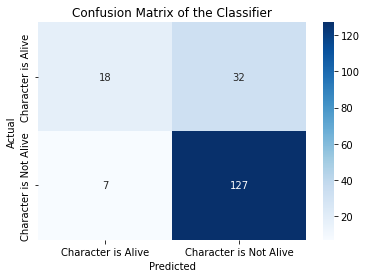

In [27]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = logreg_pred,
          labels = ['Character is Alive', 'Character is Not Alive'])

### Logistic Regression: Hyperparameter Tuning

In [28]:
########################################
# RandomizedSearchCV
########################################

# declaring a hyperparameter space
C_range          = np.arange(0.1, 5.0, 0.1) # From 0.1 to 5.0 in 1.0 increments
warm_start_range = [True, False]
solver_range     = ['newton-cg', 'sag', 'lbfgs']


# creating a hyperparameter grid
param_grid = {'C'          : C_range,
              'warm_start' : warm_start_range,
              'solver'     : solver_range}


# INSTANTIATING the model object without hyperparameters
lr_tuned = LogisticRegression(random_state = 219,
                              max_iter     = 1000) # increased for convergence


# GridSearchCV object
lr_tuned_cv = RandomizedSearchCV(estimator           = lr_tuned,   # the model object
                                 param_distributions = param_grid, # parameters to tune
                                 cv                  = 3,          # how many folds in cross-validation
                                 n_iter              = 250,        # number of combinations of hyperparameters to try
                                 random_state        = 219,        # starting point for random sequence
                                 scoring = make_scorer(
                                           roc_auc_score,
                                           needs_threshold = False)) # scoring criteria (AUC)


# FITTING to the FULL DATASET (due to cross-validation)
lr_tuned_cv.fit(got_data, got_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", lr_tuned_cv.best_params_)
print("Tuned CV AUC      :", lr_tuned_cv.best_score_.round(4))

Tuned Parameters  : {'warm_start': True, 'solver': 'newton-cg', 'C': 3.0000000000000004}
Tuned CV AUC      : 0.5637


In [29]:
# checking the best estimator for the model
lr_tuned_cv.best_estimator_ 

LogisticRegression(C=3.0000000000000004, max_iter=1000, random_state=219,
                   solver='newton-cg', warm_start=True)

In [30]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
lr_tuned = LogisticRegression(C            = 4.3,
                              warm_start   = True,
                              solver       = 'sag',
                              max_iter     = 1000,
                              random_state = 219)


# FITTING the model
lr_tuned.fit(x_train, y_train)


# PREDICTING based on the testing set
lr_tuned_pred = lr_tuned.predict(x_test)


# SCORING the results
print('Training ACCURACY:', lr_tuned.score(x_train,y_train).round(4))
print('Testing  ACCURACY:', lr_tuned.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                  y_score = lr_tuned_pred).round(4))


# saving scoring data for future use
lr_tuned_train_score = lr_tuned.score(x_train, y_train).round(4) # accuracy
lr_tuned_test_score  = lr_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
lr_tuned_auc         = roc_auc_score(y_true  = y_test,
                                     y_score = lr_tuned_pred).round(4) # auc

Training ACCURACY: 0.7718
Testing  ACCURACY: 0.788
AUC Score        : 0.6539


## 4.2 Decision Tree

In [31]:
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = x_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

In [32]:
# INSTANTIATING a classification tree object
full_tree = DecisionTreeClassifier()


# FITTING the training data
full_tree_fit = full_tree.fit(x_train, y_train)


# PREDICTING on new data
full_tree_pred = full_tree_fit.predict(x_test)


# SCORING the model
print('Full Tree Training ACCURACY:', full_tree_fit.score(x_train,
                                                     y_train).round(4))

print('Full Tree Testing ACCURACY :', full_tree_fit.score(x_test,
                                                     y_test).round(4))

print('Full Tree AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = full_tree_pred).round(4))


# saving scoring data for future use
full_tree_train_score = full_tree_fit.score(x_train, y_train).round(4) # accuracy
full_tree_test_score  = full_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC
full_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = full_tree_pred).round(4) # auc
# savig train-test gap
full_tree_gap= abs(full_tree_train_score - full_tree_test_score).round(4)

Full Tree Training ACCURACY: 0.9183
Full Tree Testing ACCURACY : 0.7717
Full Tree AUC Score: 0.674


In [33]:
# unpacking the confusion matrix
full_tree_tn, \
full_tree_fp, \
full_tree_fn, \
full_tree_tp = confusion_matrix(y_true = y_test, y_pred = full_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {full_tree_tn}
False Positives: {full_tree_fp}
False Negatives: {full_tree_fn}
True Positives : {full_tree_tp}
""")


True Negatives : 23
False Positives: 27
False Negatives: 15
True Positives : 119



## 4.3 K-Nearest Neighbor
### Hyperparameter Tuning

In [34]:
########################################
# optimal_neighbors
########################################
def optimal_neighbors(x_data,
                      y_data,
                      standardize = True,
                      pct_test=0.25,
                      seed=219,
                      response_type='reg',
                      max_neighbors=20,
                      show_viz=True):
    """
Exhaustively compute training and testing results for KNN across
[1, max_neighbors]. Outputs the maximum test score and (by default) a
visualization of the results.
PARAMETERS
----------
x_data        : explanatory variable data
y_data        : response variable
standardize   : whether or not to standardize the x data, default True
pct_test      : test size for training and validation from (0,1), default 0.25
seed          : random seed to be used in algorithm, default 219
response_type : type of neighbors algorithm to use, default 'reg'
    Use 'reg' for regression (KNeighborsRegressor)
    Use 'class' for classification (KNeighborsClassifier)
max_neighbors : maximum number of neighbors in exhaustive search, default 20
show_viz      : display or surpress k-neigbors visualization, default True
"""    
    
    
    if standardize == True:
        # optionally standardizing x_data
        scaler             = StandardScaler()
        scaler.fit(x_data)
        x_scaled           = scaler.transform(x_data)
        x_scaled_df        = pd.DataFrame(x_scaled)
        x_data             = x_scaled_df



    # train-test split
    x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building the model based on response variable type
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
        
        # recording the training set accuracy
        training_accuracy.append(clf.score(x_train, y_train))
    
        # recording the generalization accuracy
        test_accuracy.append(clf.score(x_test, y_test))


    # optionally displaying visualization
    if show_viz == True:
        # plotting the visualization
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1


########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

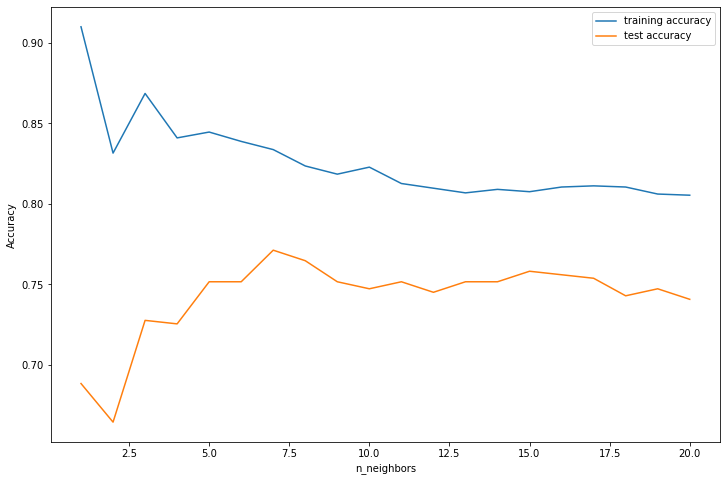

The optimal number of neighbors is: 7


In [35]:
# determining the optimal number of neighbors
opt_neighbors = optimal_neighbors(x_data        = got_data,
                                  y_data        = got_target,
                                  response_type = 'class')

In [36]:
# INSTANTIATING StandardScaler()
scaler = StandardScaler()

# FITTING the data
scaler.fit(got_data)


# TRANSFORMING the data
x_scaled     = scaler.transform(got_data)


# converting to a DataFrame
x_scaled_df  = pd.DataFrame(x_scaled) 


# train-test split with the scaled data
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
            x_scaled_df,
            got_target,
            random_state = 219,
            test_size    = 0.10,
            stratify     = got_target)


# INSTANTIATING a KNN classification model with optimal neighbors
knn_opt = KNeighborsClassifier(n_neighbors = opt_neighbors)


# FITTING the training data
knn_fit = knn_opt.fit(x_train_scaled, y_train_scaled)


# PREDICTING based on the testing set
knn_pred = knn_fit.predict(x_test_scaled)


# SCORING the results
print('Training ACCURACY:', knn_fit.score(x_train_scaled, y_train_scaled).round(4))
print('Testing  ACCURACY:', knn_fit.score(x_test_scaled, y_test_scaled).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4))


# saving scoring data
knn_train_score = knn_fit.score(x_train_scaled, y_train_scaled).round(4)
knn_test_score  = knn_fit.score(x_test_scaled, y_test_scaled).round(4)


# saving AUC score
knn_auc_score   = roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4)
knn_gap= abs(knn_train_score - knn_test_score).round(4)

Training ACCURACY: 0.8263
Testing  ACCURACY: 0.8207
AUC Score        : 0.7264


In [37]:
# unpacking the confusion matrix
knn_tree_tn, \
knn_tree_fp, \
knn_tree_fn, \
knn_tree_tp = confusion_matrix(y_true = y_test, y_pred = knn_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {knn_tree_tn}
False Positives: {knn_tree_fp}
False Negatives: {knn_tree_fn}
True Positives : {knn_tree_tp}
""")


True Negatives : 26
False Positives: 24
False Negatives: 9
True Positives : 125



## 5) Models Performance

In [38]:
# creating a dictionary for model results
model_performance = {
    
    'Model Name'    : ['Logistic Regression (Tuned)','Decision Tree','KNN (Tuned)'],
           
    'AUC Score' : [logreg_auc_score,full_tree_auc_score,knn_auc_score],
    
    'Training Accuracy' : [logreg_train_score,full_tree_train_score,knn_train_score],
           
    'Testing Accuracy'  : [logreg_test_score,full_tree_test_score,knn_test_score],
    
    'Train Test Gap' : [log_gap,full_tree_gap,knn_gap],

    'Confusion Matrix TN, FP, FN, TP '  : [(logreg_tn, logreg_fp, logreg_fn, logreg_tp),
                                          (full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp),
                                          (knn_tree_tn, knn_tree_fp, knn_tree_fn, knn_tree_tp)]}


#converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)

model_performance


,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Train Test Gap,"Confusion Matrix TN, FP, FN, TP"
0,Logistic Regression (Tuned),0.6539,0.7700,0.7880,0.0180,"(18, 32, 7, 127)"
1,Decision Tree,0.6740,0.9183,0.7717,0.1466,"(23, 27, 15, 119)"
2,KNN (Tuned),0.7264,0.8263,0.8207,0.0056,"(26, 24, 9, 125)"


In [39]:
print("""Model Chosen: KNN
*Lowest Train-test gap.
*Provides the highest AUC.
*Hyperparameter tuning improved the model.""")

Model Chosen: KNN
*Lowest Train-test gap.
*Provides the highest AUC.
*Hyperparameter tuning improved the model.
